In [1]:
import csv
import numpy as np
import os
import pandas as pd
import title_generator
import matplotlib.pyplot as plt

### Translate into Polish

In [2]:
from tqdm.notebook import trange, tqdm

In [3]:
#translated_data = [(translate_to_polish(x[0]), translate_to_polish(x[1])) for x in tqdm(data)]

## Load Translated data

In [4]:
rows = []
for data in os.listdir("./data/pl_data/"):
    if data.startswith("pl"):
        rows += [tuple(row) for row in csv.reader(open(f"./data/pl_data/{data}", 'r'))]

data = pd.DataFrame(rows, columns=["Abstract", "Title"])
data.head()

,Abstract,Title
0,Zaburzenie limfoproliferacyjne reprezentuje he...,Zaburzenie limfoproliferacyjne podczas leczeni...
1,Nośniki substancji rozpuszczonych (SLC) są nie...,Wpływ transporterów nośników rozpuszczonych w ...
2,Zanieczyszczenia środowiska stanowią zagrożeni...,"Potencjalnie toksyczne metale w kurzu, krwi i ..."
3,"Genisteina, powszechnie występujący izoflawon,...",Genisteina: obiecujący modulator apoptozy i sy...
4,"<i>C. brachyspora</i>, szeroko rozpowszechnion...",Biotechnologiczne zastosowanie egzopolisachary...


# Preprocessing

1) Lower case transform
2) Remove html tags
3) remove https links
4) remove text inside all types of brackets
5) remove digits
6) polish tokenizer
7) remove stopwords

In [5]:
data_pre_proc = title_generator.pre_processing(data)

data_pre_proc

[PREPROCESSING]  'lower_case_preprocessing'
[PREPROCESSING] Done!
[PREPROCESSING]  'html_tags_preprocessing'
[PREPROCESSING] Done!
[PREPROCESSING]  'https_pre_processing'
[PREPROCESSING] Done!
[PREPROCESSING]  'brackets_preprocessing'
[PREPROCESSING] Done!
[PREPROCESSING]  'digits_preprocessing'
[PREPROCESSING] Done!
[PREPROCESSING]  'polish_words_tokenize'


Tokenizing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 60000/60000 [12:29<00:00, 80.05element/s]


[PREPROCESSING] Done!
[PREPROCESSING]  'punctuation_preprocessing'
[PREPROCESSING] Done!
[PREPROCESSING]  'polish_stopwords_preprocessing'
[PREPROCESSING] Done!


,Abstract,Title
0,"[zaburzenie, limfoproliferacyjne, reprezentuje...","[zaburzenie, limfoproliferacyjne, leczenia, te..."
1,"[nośniki, substancji, rozpuszczonych, niezbędn...","[wpływ, transporterów, nośników, rozpuszczonyc..."
2,"[zanieczyszczenia, środowiska, stanowią, zagro...","[potencjalnie, toksyczne, metale, kurzu, krwi,..."
3,"[genisteina, powszechnie, występujący, izoflaw...","[genisteina, obiecujący, modulator, apoptozy, ..."
4,"[c, brachyspora, szeroko, rozpowszechniony, gr...","[biotechnologiczne, zastosowanie, egzopolisach..."
...,...,...
29995,"[wyniku, wysiłku, fizycznego, mięśnie, uwalnia...","[krótkoterminowe, leczenie, iryzyną, zwiększył..."
29996,"[nowotwory, główną, przyczyną, zachorowalności...","[odkrycie, hipotez, nowych, predyktorów, raka,..."
29997,"[brakuje, skutecznych, terapii, farmakologiczn...","[randomizowane, badanie, pilotażowe, metod, mi..."
29998,"[astrocyty, pełnią, podstawowych, funkcji, móz...","[zanikowe, astrocyty, starych, marmozet, wykaz..."


# EDA

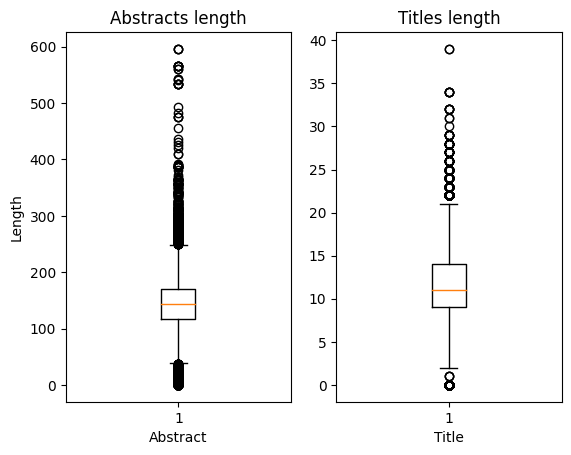

In [6]:
abstract_len = data_pre_proc["Abstract"].apply(lambda x: len(x))
title_len = data_pre_proc["Title"].apply(lambda x: len(x))

# Example data
fig, (ax1, ax2) = plt.subplots(1, 2)

# Plotting the boxplot
ax1.boxplot(abstract_len)
ax2.boxplot(title_len)

# Adding labels and title
ax1.set_xlabel('Abstract')
ax1.set_ylabel('Length')
ax1.set_title('Abstracts length')
ax2.set_xlabel('Title')
ax2.set_title('Titles length')

# Display the plot
plt.show()

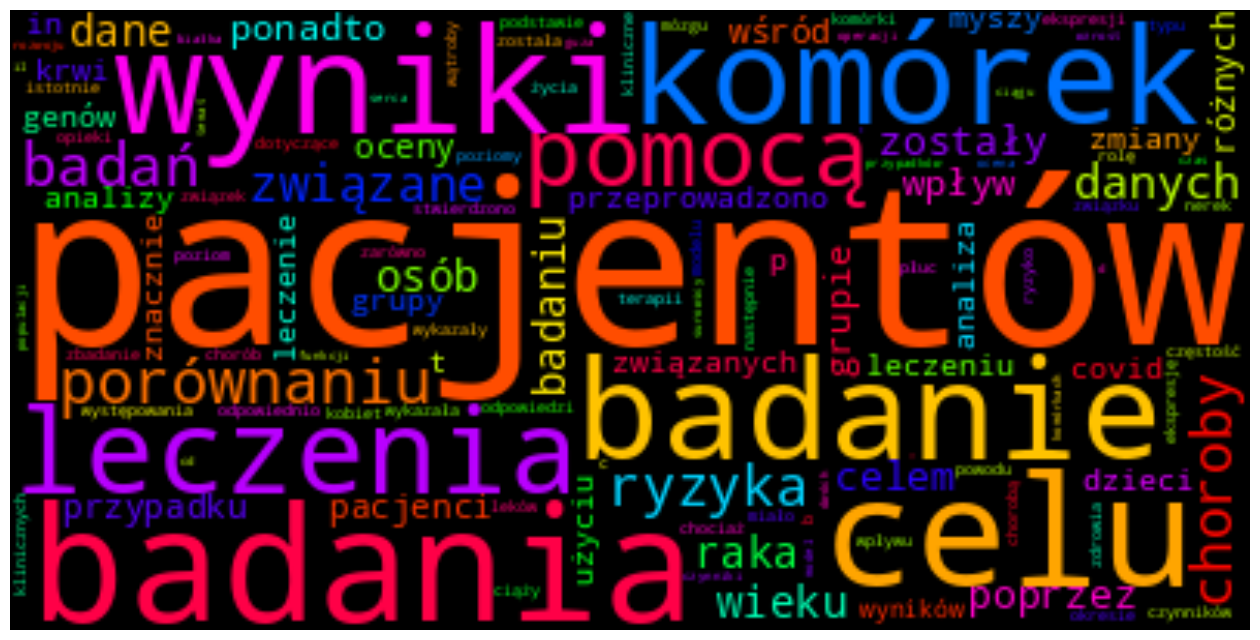

In [7]:
from wordcloud import WordCloud 
from nltk.probability import FreqDist

fd_abstracts = FreqDist([item for sublist in data_pre_proc["Abstract"] for item in sublist])

cloud = WordCloud(max_font_size=80,colormap="hsv").generate_from_frequencies(fd_abstracts)
plt.figure(figsize=(16,12)) #wymiar obrazka
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

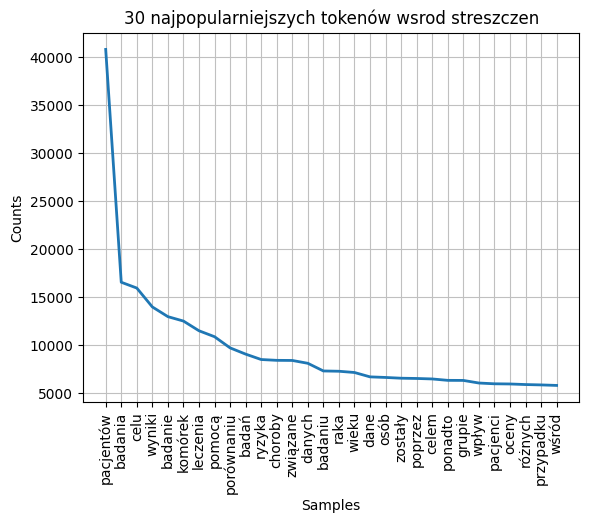

In [8]:
fd_abstracts.plot(30,title='30 najpopularniejszych tokenów wsrod streszczen')
plt.show()

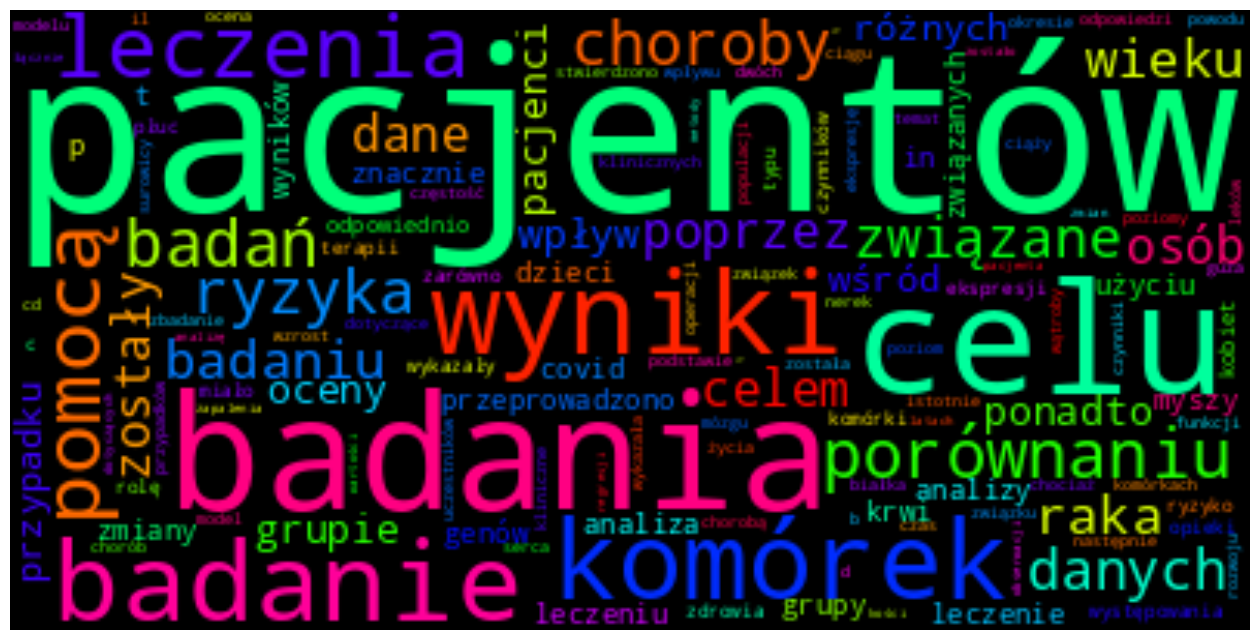

In [9]:
fd_titles = FreqDist([item for sublist in data_pre_proc["Title"] for item in sublist])

cloud = WordCloud(max_font_size=80,colormap="hsv").generate_from_frequencies(fd_abstracts)
plt.figure(figsize=(16,12)) #wymiar obrazka
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

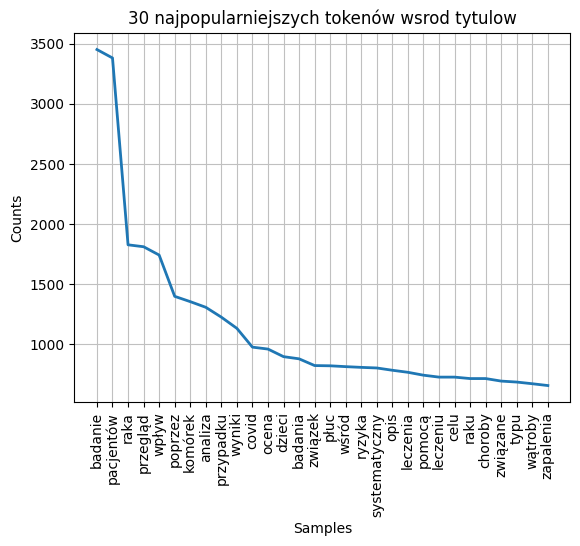

In [10]:
fd_titles.plot(30,title='30 najpopularniejszych tokenów wsrod tytulow')
plt.show()

In [17]:
from gensim.models import KeyedVectors
# word2vec = KeyedVectors.load_word2vec_format("data/pl_data/cbow_v300m8.w2v.txt", binary=False)

[('nikt', 0.6060630083084106), ('on', 0.5939128994941711), ('nigdy', 0.5671186447143555), ('by', 0.5664226412773132), ('tylko', 0.5650891661643982), ('przecież', 0.5649359226226807), ('to', 0.5559906363487244), ('ani', 0.5554643869400024), ('ja', 0.5393173098564148), ('też', 0.5354360342025757)]


/home/jakub/Desktop/title_generator/venv/lib/python3.10/site-packages/gensim/models/keyedvectors.py:849: RuntimeWarning: invalid value encountered in divide
  dists = dot(self.vectors[clip_start:clip_end], mean) / self.norms[clip_start:clip_end]


In [ ]:
print(word2vec.most_similar("covid", topn=1))

In [55]:
def transform_words_to_embeddings(words, pbar):
    embeddings = []
    for word in words:
        try:
            embedding = word2vec[word]
            embeddings.append(embedding)
        except KeyError:
            embeddings.append(np.zeros(word2vec.vector_size))
    pbar.update(1)
    return sum(embeddings)

pbar = tqdm(total=data_pre_proc.size, desc="Transforming words")
# Apply the transform_words_to_embeddings() function to each element in the DataFrame
embedding_data = data_pre_proc.applymap(lambda x: transform_words_to_embeddings(x, pbar))
pbar.close()

Transforming words: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 60000/60000 [00:06<00:00, 9039.44it/s]


In [56]:
embedding_data.head()

,Abstract,Title
0,"[0.7722139944089577, 1.9366869937512092, 0.867...","[0.13750800024718046, 0.29129300080239773, 0.0..."
1,"[0.937520008883439, 0.9986900017829612, 0.4684...","[0.015264997258782387, 0.061875991988927126, 0..."
2,"[1.5786530023615342, 0.7096230081515387, 1.440...","[0.011741000431356952, 0.03314300021156669, -0..."
3,"[0.3318100015167147, 1.6227310037938878, 0.771...","[0.006090998649597168, 0.1205499991774559, -0...."
4,"[1.5602209940552711, 0.9770459962892346, -0.87...","[0.036170998588204384, 0.23258100263774395, -0..."
